# Multi-Classification Modeling with top 4 beacons with DNN
## Index
- Load data & import modules
- Preprocessing & split
- DNN modeling
- Ploting 
- Confusion Matrix

# Load data & import moduels
- tensorflow version 2.9.1 required

In [ ]:
import pandas as pd
import pickle
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
%cd drive/MyDrive/BEST/ios_clf_direction/

/content/drive/MyDrive/BEST/ios_clf_direction


In [ ]:
# datas = [] 
# data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

# for data in data_name:
#   for index in data[1]: 
#     if index < 10:
#       no_supervised = pd.DataFrame(pd.read_csv(f'{data[0]}0{index}.csv'))
#     else:
#       no_supervised = pd.DataFrame(pd.read_csv(f'{data[0]}{index}.csv'))
#     no_supervised.drop(['timeStamp', 'accer_x', 'accer_y', 'accer_z',   'gyro_x',   'gyro_y',   'gyro_z',   'magn_x',   'magn_y',   'magn_z'], axis=1, inplace = True)
#     no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
#     datas.append(no_supervised)

# def tominus200(x) :
#   if float(x) <= -90 :
#     return -200
#   return float(x)

# beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
# for data in datas:
#   for beacon in beacons:
#     data[beacon] = data[beacon].apply(tominus200)


In [ ]:
#ios_clf_data_22_concatedE02
datas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'ios_clf_data_22_concated{data[0]}0{index}.csv'))
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'ios_clf_data_22_concated{data[0]}{index}.csv'))
    datas.append(no_supervised)

In [ ]:
!pip install wurlitzer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


## 필요한 모듈 추가하기

In [ ]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import math

try:
  from wurlitzer import sys_pipes
except:
  from colabtools.googlelog import CaptureLog as sys_pipes

from IPython.core.magic import register_line_magic
from IPython.display import Javascript

In [ ]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVR
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pathlib

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical

In [ ]:
# Check the version of TensorFlow Decision Forests
# print("Found TensorFlow Decision Forests v" + tfdf.__version__)
print(tf.__version__)

2.8.2


In [ ]:
result = pd.concat(datas)

In [ ]:
result.loc[result['location'] == 'A011', 'location'] = 'A11'
result.loc[result['location'] == 'A010', 'location'] = 'A10'

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

# result['location'] = ohe.fit_transform(result['location'])

X = np.array(result.iloc[:, 1:])
y = le.fit_transform(np.array(result['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
result.columns

Index(['Unnamed: 0', 'index', 'location', '001', '002', '003', '004', '005',
       '006', '007', '008', '009', '010', '011', '012', '013', '014', '015',
       '016', '017', '018', '019', '020', '021', '022'],
      dtype='object')

In [ ]:
result.drop(['Unnamed: 0', 'index'], axis = 1, inplace=True)

In [ ]:
result

,location,001,002,003,004,005,006,007,008,009,...,013,014,015,016,017,018,019,020,021,022
0,S01,-85.702170,-71.244017,-89.000000,-79.000000,-89.126150,-89.918040,-88.517947,-85.000000,-88.829475,...,-77.959780,-63.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-55.289627,-200.000000,-89.484200
1,S01,-81.000000,-70.000000,-88.499504,-79.000000,-89.126150,-89.918040,-88.517947,-85.500496,-85.000000,...,-74.000000,-63.000000,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-52.000000,-200.000000,-88.000000
2,S01,-82.001000,-71.501495,-88.666890,-78.665560,-89.126150,-89.918040,-88.517947,-88.698597,-86.501495,...,-74.500496,-67.513870,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-50.999000,-200.000000,-89.001000
3,S01,-82.669556,-72.337105,-88.247260,-81.065506,-89.126150,-89.918040,-88.517947,-88.698597,-87.337105,...,-75.001990,-63.334442,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-50.330452,-200.000000,-89.484200
4,S01,-83.004490,-72.252240,-87.965080,-79.756730,-89.126150,-89.918040,-88.517947,-88.698597,-88.007480,...,-76.008470,-63.753740,-200.000000,-200.000000,-200.00000,-200.000000,-200.000000,-49.492027,-200.000000,-89.484200
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
976,U01,-89.973560,-200.000000,-89.956200,-89.438040,-87.686516,-86.662860,-81.896020,-87.874920,-87.428120,...,-200.000000,-200.000000,-84.775520,-71.862980,-66.38983,-66.030690,-77.016140,-200.000000,-86.762620,-89.598840
977,U01,-89.973560,-200.000000,-89.956200,-89.438040,-87.686516,-86.590130,-81.813095,-87.617980,-87.428120,...,-200.000000,-200.000000,-84.741600,-71.912710,-66.54772,-65.941880,-80.932260,-200.000000,-83.669420,-89.485176
978,U01,-89.973560,-200.000000,-89.956200,-89.438040,-87.686516,-85.795204,-81.777534,-87.416016,-87.428120,...,-200.000000,-200.000000,-84.577965,-74.970460,-66.69871,-66.119360,-77.015434,-200.000000,-83.640144,-89.420230
979,U01,-89.973560,-200.000000,-89.956200,-89.438040,-89.920334,-86.651794,-81.743520,-87.932230,-87.428120,...,-200.000000,-200.000000,-81.002690,-71.960266,-67.10002,-66.332820,-76.971020,-200.000000,-83.612150,-89.401850


# DNN을 활용한 Classification


In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result.iloc[:, 1:])
y = le.fit_transform(np.array(result['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
X = np.asarray(X).astype(np.float32)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=42,shuffle=True)

In [ ]:
X_train.shape

(21564, 22)

In [ ]:
!pip install tensorflow-addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.1 MB 33.3 MB/s 


In [ ]:
import tensorflow_addons as tfa

In [ ]:
class ClearTrainingOutput(tf.keras.callbacks.Callback):
  def on_train_end(*args, **kwargs):
    IPython.display.clear_output(wait = True)

In [ ]:
!pip install IPython
import IPython

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
checkpoint_path = "training_3/cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

# 모델의 가중치를 저장하는 콜백 만들기
cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_path,
                                                 save_weights_only=True,
                                                 verbose=1)

In [ ]:
tf.random.set_seed(42)
initializer = tf.keras.initializers.HeNormal()

def model_builder(hp):
   model = keras.Sequential()
    
   # 첫번째 Dense 레이어 32~512까지 노드 수 조정
   hp_unit = hp.Int('units', min_value=32, max_value=256, step=32)
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tfa.layers.WeightNormalization(tf.keras.layers.Dense(units=hp_unit, activation = tf.keras.activations.relu, input_shape=[22], kernel_initializer=initializer)))
   model.add(tf.keras.layers.Dropout(0.3))
   model.add(keras.layers.Dense(31, activation = 'softmax'))

   # 학습률(learning rate)을 조정[0.01, 0.001, 0.0001]
   # hp.choice: 그 list 안에서 뽑는다.
   hp_learning_rate = hp.Choice('learning_rate', values = [1e-2, 1e-3, 1e-4]) 

   opt = keras.optimizers.Adam(learning_rate=hp_learning_rate)
   loss = tf.keras.losses.categorical_crossentropy
   model.compile(optimizer= opt, loss=loss, metrics=['accuracy', tf.keras.metrics.Precision(), tf.keras.metrics.Recall(), tfa.metrics.F1Score(num_classes=31, average='macro', threshold=0.5)])


   return model

In [ ]:
!pip install -q -U keras-tuner
import kerastuner as kt

     |████████████████████████████████| 135 kB 21.9 MB/s 


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  


In [ ]:
tuner = kt.Hyperband(model_builder,
                     objective = 'val_accuracy', 
                     max_epochs = 30,
                     factor=3,
                     hyperband_iterations=2,
                     directory = 'hi',
                     project_name = 'ios_clf_8')

INFO:tensorflow:Reloading Oracle from existing project hi/ios_clf_8/oracle.json


INFO:tensorflow:Reloading Oracle from existing project hi/ios_clf_8/oracle.json


INFO:tensorflow:Reloading Tuner from hi/ios_clf_8/tuner0.json


INFO:tensorflow:Reloading Tuner from hi/ios_clf_8/tuner0.json


In [ ]:
tuner.search(X_train, y_train, epochs = 50, validation_data = (X_test, y_test), callbacks = [ClearTrainingOutput()])

# Get the optimal hyperparameters
best_hps = tuner.get_best_hyperparameters(num_trials = 1)[0]

print(f"""
The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is {best_hps.get('units')} and the optimal learning rate for the optimizer
is {best_hps.get('learning_rate')}.
""")

INFO:tensorflow:Oracle triggered exit


INFO:tensorflow:Oracle triggered exit



The hyperparameter search is complete. The optimal number of units in the first densely-connected
layer is 160 and the optimal learning rate for the optimizer
is 0.001.



In [ ]:
model_based_tuner = tuner.hypermodel.build(best_hps)
history = model_based_tuner.fit(X_train, y_train, batch_size=32, epochs=50, validation_data=(X_train,y_train))

Epoch 1/50
674/674 [==============================] - 21s 23ms/step - loss: 0.6350 - accuracy: 0.7641 - precision_1: 0.8703 - recall_1: 0.6830 - f1_score: 0.7492 - val_loss: 0.2351 - val_accuracy: 0.8945 - val_precision_1: 0.9083 - val_recall_1: 0.8873 - val_f1_score: 0.8791
Epoch 2/50
674/674 [==============================] - 15s 23ms/step - loss: 0.1871 - accuracy: 0.9289 - precision_1: 0.9387 - recall_1: 0.9160 - f1_score: 0.9264 - val_loss: 0.0652 - val_accuracy: 0.9800 - val_precision_1: 0.9815 - val_recall_1: 0.9777 - val_f1_score: 0.9792
Epoch 3/50
674/674 [==============================] - 14s 20ms/step - loss: 0.1282 - accuracy: 0.9539 - precision_1: 0.9576 - recall_1: 0.9501 - f1_score: 0.9539 - val_loss: 0.1851 - val_accuracy: 0.9178 - val_precision_1: 0.9196 - val_recall_1: 0.9160 - val_f1_score: 0.9080
Epoch 4/50
674/674 [==============================] - 15s 23ms/step - loss: 0.0852 - accuracy: 0.9683 - precision_1: 0.9706 - recall_1: 0.9668 - f1_score: 0.9688 - val_loss

In [ ]:
model_based_tuner_dict = history.history
model_based_tuner_dict.keys()

dict_keys(['loss', 'accuracy', 'precision_1', 'recall_1', 'f1_score', 'val_loss', 'val_accuracy', 'val_precision_1', 'val_recall_1', 'val_f1_score'])

In [ ]:
results = model_based_tuner.evaluate(X_test,  y_test, verbose=2)

289/289 - 1s - loss: 0.0085 - accuracy: 0.9971 - precision_1: 0.9971 - recall_1: 0.9971 - f1_score: 0.9971 - 650ms/epoch - 2ms/step


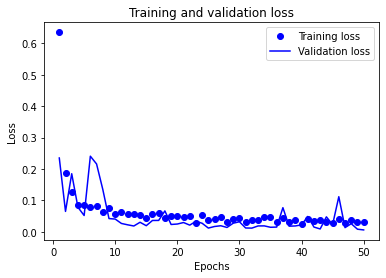

In [ ]:
acc = model_based_tuner_dict['accuracy']
val_acc = model_based_tuner_dict['val_accuracy']
loss = model_based_tuner_dict['loss']
val_loss = model_based_tuner_dict['val_loss']
recall = model_based_tuner_dict['recall_1']
val_recall = model_based_tuner_dict['val_recall_1']
f1_score = model_based_tuner_dict['f1_score']
val_f1_score = model_based_tuner_dict['val_f1_score']

epochs = range(1, len(acc) + 1)

# "bo"는 "파란색 점"입니다
plt.plot(epochs, loss, 'bo', label='Training loss')
# b는 "파란 실선"입니다
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

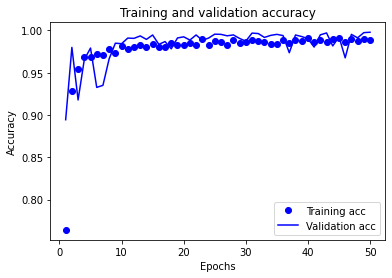

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

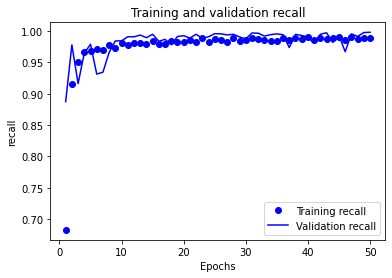

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, recall, 'bo', label='Training recall')
plt.plot(epochs, val_recall, 'b', label='Validation recall')
plt.title('Training and validation recall')
plt.xlabel('Epochs')
plt.ylabel('recall')
plt.legend()

plt.show()

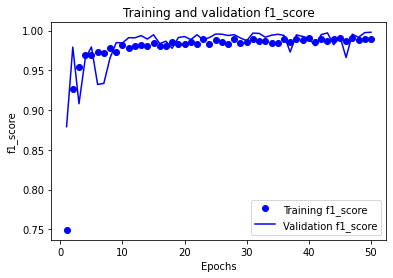

In [ ]:
plt.clf()   # 그림을 초기화합니다

plt.plot(epochs, f1_score, 'bo', label='Training f1_score')
plt.plot(epochs, val_f1_score, 'b', label='Validation f1_score')
plt.title('Training and validation f1_score')
plt.xlabel('Epochs')
plt.ylabel('f1_score')
plt.legend()

plt.show()

In [ ]:
results = model_based_tuner.evaluate(X_test,  y_test, verbose=2)

289/289 - 1s - loss: 0.0085 - accuracy: 0.9971 - precision_1: 0.9971 - recall_1: 0.9971 - f1_score: 0.9971 - 1s/epoch - 5ms/step


[16 17 10 ...  4 16 24]
Confusion Matrix


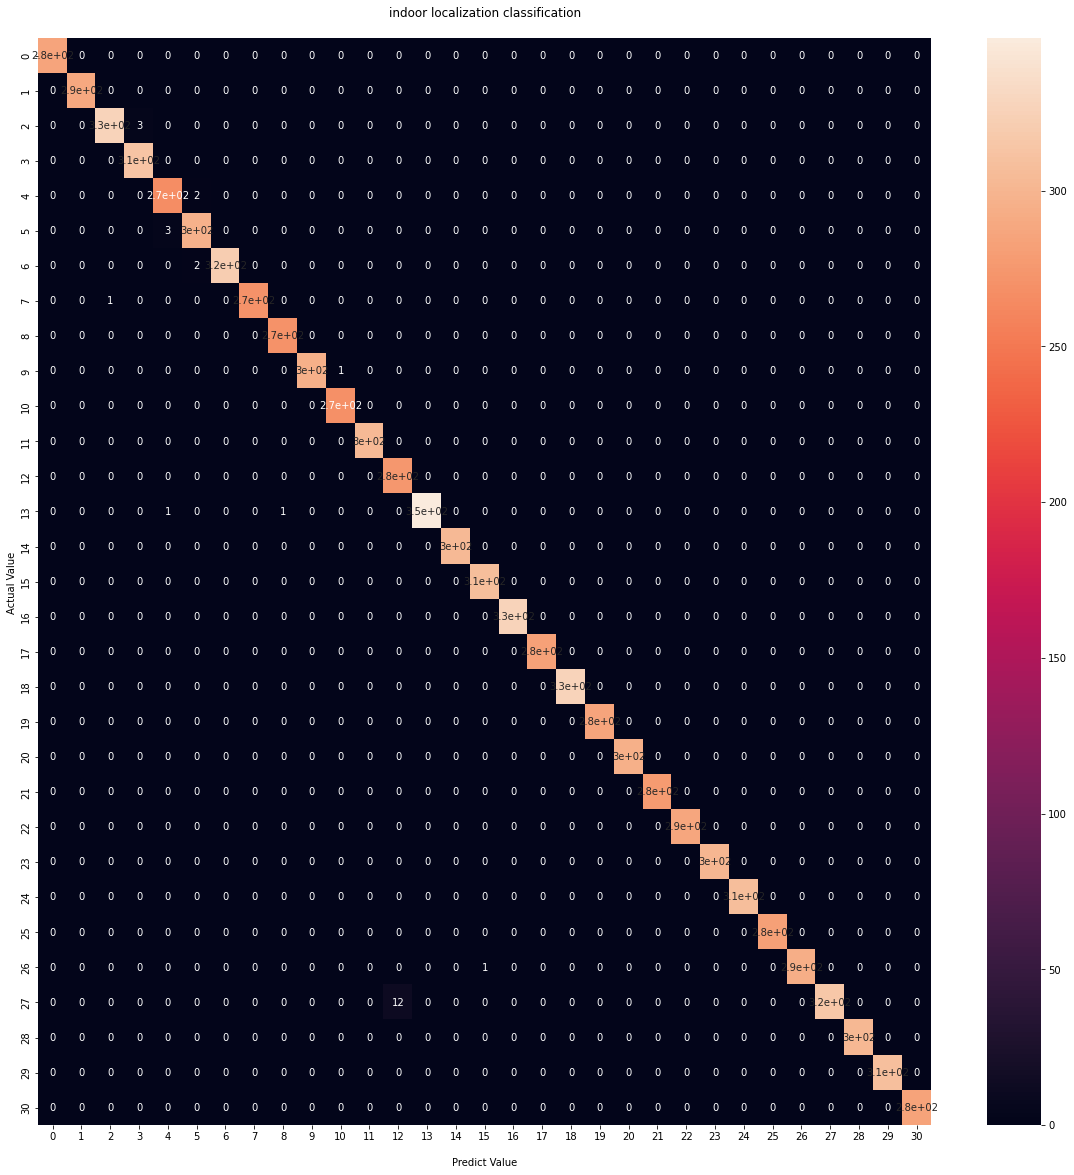

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['S01','S02', 'S03','S04','S05','S06','S07','S08','S09', 'E01','E02','E03', 'R01', 'R02', 'R03', 'R04',
           'R05', 'H01', 'H02', 'A01', 'A02', 'A03','A04','A05','A06','A07','A08','A09','A10', 'A11', 'U01']
y_test_arg=np.argmax(y,axis=1)
y_test = le.inverse_transform(y_test_arg)
Y_pred = np.argmax(model_based_tuner.predict(X),axis=1)
Y_pred = le.inverse_transform(Y_pred)

# print(Y_pred)
# print('Confusion Matrix')
tick_marks = np.arange(len(labels))
cf_matrix = confusion_matrix(y_test, Y_pred, labels = labels)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True, fmt='.2f')
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
# # Convert the model.
# converter = tf.lite.TFLiteConverter.from_keras_model(model_based_tuner)
# converter.experimental_enable_resource_variables = True
# tflite_model = converter.convert()

# # Save the model.
# with open('ios_beacon_allconcat.tflite', 'wb') as f:
#   f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmp9471a5zi/assets


INFO:tensorflow:Assets written to: /tmp/tmp9471a5zi/assets


In [ ]:
# interpreter = tf.lite.Interpreter(model_path="ios_clf_NN_model_for_beacon5.tflite")
# interpreter.allocate_tensors()

# # Print input shape and type
# inputs = interpreter.get_input_details()
# print('{} input(s):'.format(len(inputs)))
# for i in range(0, len(inputs)):
#     print('{} {}'.format(inputs[i]['shape'], inputs[i]['dtype']))

# # Print output shape and type
# outputs = interpreter.get_output_details()
# print('\n{} output(s):'.format(len(outputs)))
# for i in range(0, len(outputs)):
#     print('{} {}'.format(outputs[i]['shape'], outputs[i]['dtype']))

# TEST DATA

In [ ]:
testdatas = [] 
data_name = [('S', [1,2,3,4,5,6,7,8,9]), ('E', [1,2,3]), ('R',[1,2,3,4,5]), ('H', [1,2]), ('A', [1,2,3,4,5,6,7,8,9,10,11]), ('U', [1]) ]

#Filtered_Test_U01

for data in data_name:
  for index in data[1]: 
    if index < 10:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}0{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}0{index}')
    else:
      no_supervised = pd.DataFrame(pd.read_csv(f'../test_data/Filtered_Test_{data[0]}{index}.csv'))
      no_supervised.drop('direction', axis=1, inplace=True)
      no_supervised.drop('heading', axis=1, inplace=True)
      no_supervised.drop('timeStamp', axis=1, inplace=True)
      no_supervised.insert(0, 'location' ,f'{data[0]}{index}')
    testdatas.append(no_supervised)


def tominus200(x) :
  if float(x) <= -90 :
    return -200
  return float(x)

beacons = ['001','002','003','004','005','006','007','008','009','010','011','012','013','014','015','016','017','018','019','020','021', '022']
for data in testdatas:
  for beacon in beacons:
    data[beacon] = data[beacon].apply(tominus200)

In [ ]:
for data in testdatas:
  for row_index in range(len(data)):
    if row_index % 2 == 1:
      for col_index in range(1, len(data.columns)):
        if data.iloc[row_index - 1, col_index] > data.iloc[row_index, col_index]:
          data.iloc[row_index, col_index] = data.iloc[row_index - 1, col_index]


In [ ]:
for index in range(len(testdatas)):
  testdatas[index] = testdatas[index].iloc[1::2,:]
for index in range(len(testdatas)):
  testdatas[index].reset_index(inplace=True)
for index in range(len(testdatas)):
  testdatas[index].drop('index', axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
result_test = pd.concat(testdatas)

In [ ]:
result_test.reset_index(inplace=True)

In [ ]:
result_test.drop('index', axis=1, inplace=True)

In [ ]:
np.set_printoptions(precision=2)
le = LabelEncoder()

X = np.array(result_test.iloc[:, 1:])
y = le.fit_transform(np.array(result_test['location']).reshape(-1, 1))
y = to_categorical(y)

/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_label.py:115: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


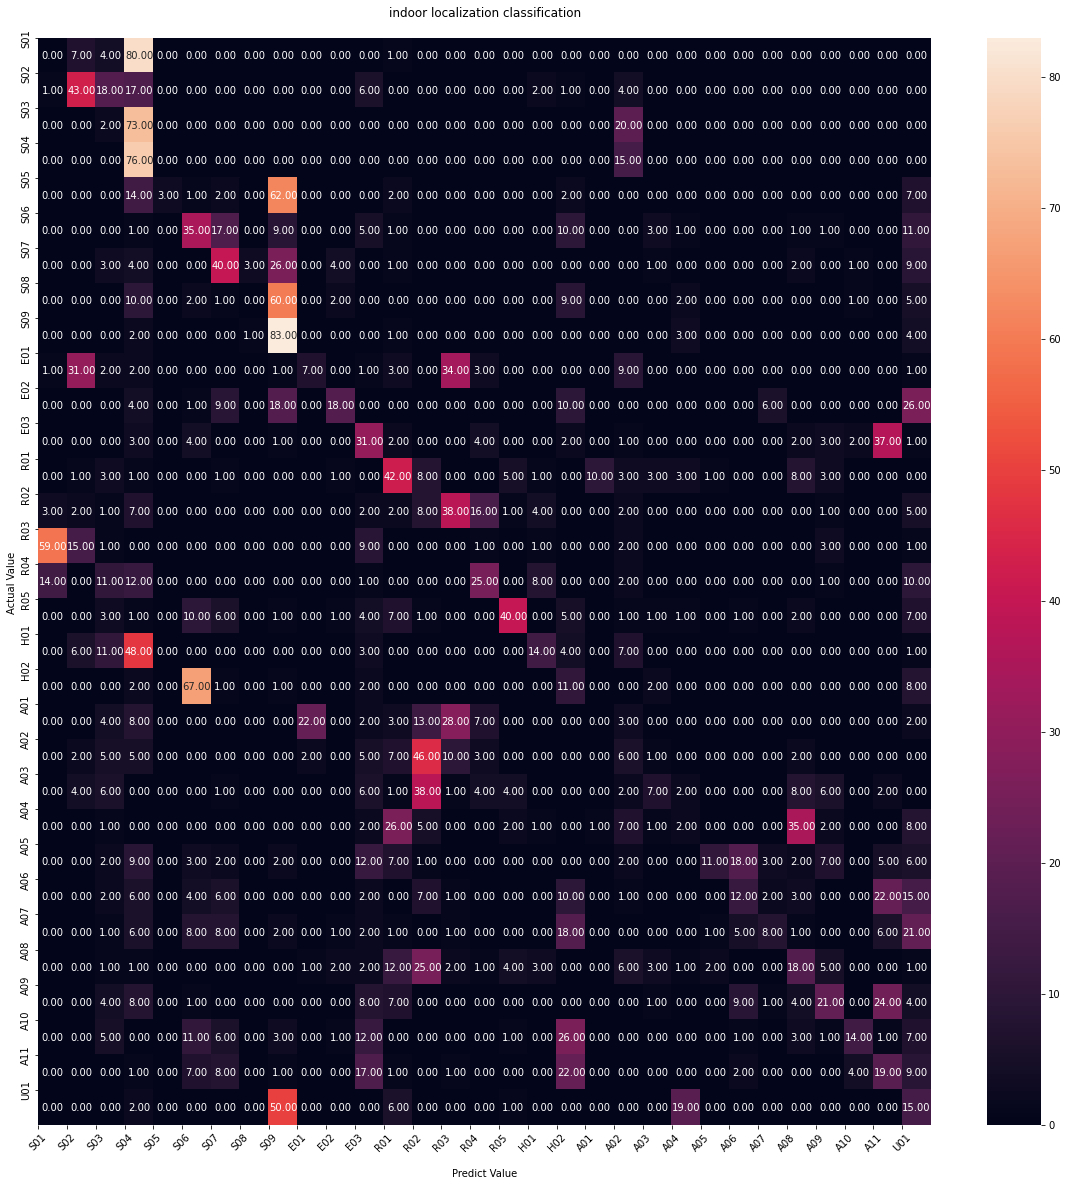

In [ ]:
from sklearn.metrics import confusion_matrix

labels = ['S01','S02', 'S03','S04','S05','S06','S07','S08','S09', 'E01','E02','E03', 'R01', 'R02', 'R03', 'R04',
           'R05', 'H01', 'H02', 'A01', 'A02', 'A03','A04','A05','A06','A07','A08','A09','A10', 'A11', 'U01']
y_test_arg=np.argmax(y,axis=1)
y_test2 = le.inverse_transform(y_test_arg)
Y_pred = np.argmax(model_based_tuner.predict(X),axis=1)
Y_pred2 = le.inverse_transform(Y_pred)

# print(Y_pred)
# print('Confusion Matrix')
tick_marks = np.arange(len(labels))
cf_matrix = confusion_matrix(y_test2, Y_pred2, labels = labels)
cmn = cf_matrix.astype('float') / cf_matrix.sum(axis=1)[:, np.newaxis]

plt.figure(figsize=(20, 20)) 
ax = sns.heatmap(cf_matrix, annot = True, fmt='.2f')
plt.xticks(tick_marks, labels, rotation=45)
plt.yticks(tick_marks, labels)

ax.set_title('indoor localization classification\n')
ax.set_xlabel('\nPredict Value')
ax.set_ylabel('Actual Value ')
plt.show()

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

print("f1score: ", f1_score(y_true=y_test_arg, y_pred=Y_pred, average='weighted'))
print("accuracy: ", accuracy_score(y_true=y_test_arg, y_pred=Y_pred))
print("precision: ", precision_score(y_true=y_test_arg, y_pred=Y_pred, average='weighted'))
print("recall: ", recall_score(y_true=y_test_arg, y_pred=Y_pred,  average='weighted'))

f1score:  0.19175751092493742
accuracy:  0.21326352530541012
precision:  0.28086202405700333
recall:  0.21326352530541012


In [ ]:
from sklearn.metrics import classification_report

report = classification_report(y_test2, Y_pred2, target_names=labels)

In [ ]:
print(report)

              precision    recall  f1-score   support

         S01       0.00      0.00      0.00        92
         S02       0.06      0.06      0.06        94
         S03       0.30      0.08      0.12        92
         S04       0.06      0.02      0.03        93
         S05       0.73      0.12      0.21        92
         S06       0.25      0.13      0.17        93
         S07       0.40      0.09      0.15        90
         S08       0.20      0.20      0.20        90
         S09       0.39      0.23      0.29        92
         E01       0.64      0.15      0.25        92
         E02       0.16      0.21      0.18        92
         E03       0.22      0.07      0.11        95
         R01       0.60      0.20      0.30        92
         R02       0.23      0.33      0.27        93
         R03       0.41      0.15      0.22        94
         R04       0.08      0.12      0.10        94
         R05       0.32      0.45      0.37        94
         H01       0.05    

In [ ]:
model_based_tuner.save('ios_beacon_DNN_22')

INFO:tensorflow:Assets written to: ios_beacon_DNN_22/assets


INFO:tensorflow:Assets written to: ios_beacon_DNN_22/assets
